<a href="https://colab.research.google.com/github/nadaYossef/practice-python/blob/main/music_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn

In [4]:
df = pd.read_csv('/music.csv')
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [6]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [7]:
df['genre'].unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: xlabel='genre', ylabel='count'>

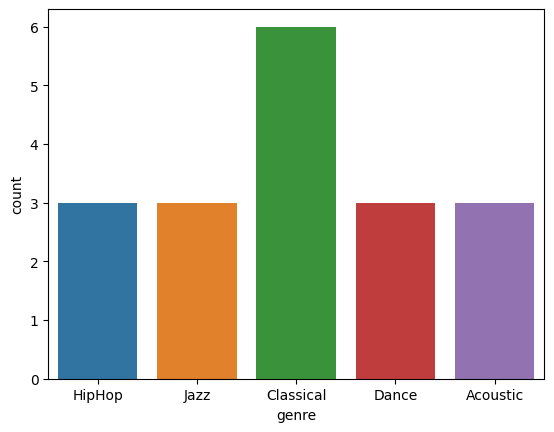

In [22]:
sns.countplot(x =df['genre'], data = df)

<Axes: xlabel='age', ylabel='count'>

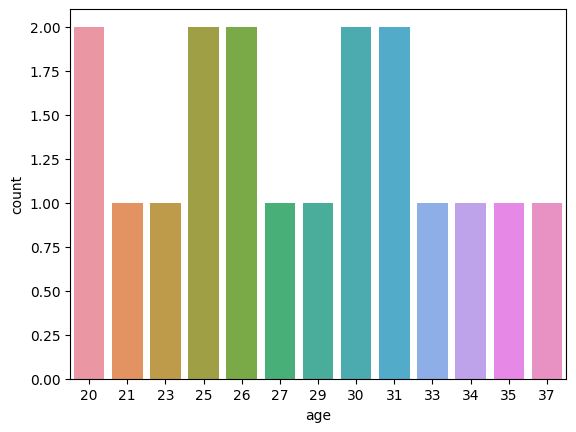

In [25]:
sns.countplot(x =df['age'], data = df)

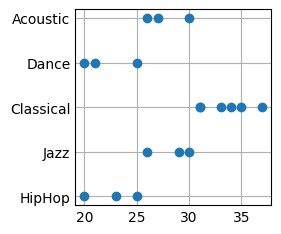

In [27]:

plt.scatter(x=df['age'],y=df['genre'])

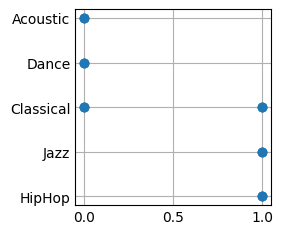

In [28]:
plt.scatter(x=df['gender'],y=df['genre'])

In [37]:
withGenre = df['genre']
withoutGenre = df.drop(columns=['genre'])
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(withoutGenre,withGenre)
model.predict([[20,0],[30,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dance', 'Jazz'], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(withoutGenre,withGenre,test_size= 0.3) #the less the size the better prediction
model.fit(X_train,Y_train)
predict=model.predict(X_test)
acc=accuracy_score(Y_test,predict)
acc

1.0

In [45]:
from sklearn import tree
tree.export_graphviz(model,out_file='music_recommendation.dot',feature_names=['age','gender'],label='all',class_names=sorted(withGenre.unique()),rounded=True,filled=True)